In [1]:
#
# Predict the mean of each store/day-of-week combo.
#
# This results in a MSE of 0.23633, and would have resulted in placing
# about 2785th (out of 3303) in the competition.  Note that this code is super inefficient.
#
# Can you do better?
#
 
import numpy as np
import pandas
from datetime import date
import random
import matplotlib.pyplot as plt

# this is our training data
data = pandas.read_csv( 'store_train.csv' )
 
# these are what we need to make predictions for
testd = pandas.read_csv( 'store_test.csv' )



/Users/catmcqueen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
def store_kernel(i,j):
    if (i == j):
        return 1
    return 0

def date_kernel(i,j):
    datei = date(*map(int, i.split('-')))
    datej = date(*map(int, j.split('-')))
    points = 0
    if (datei.month == datej.month):
        points += 1
        if (datei.day == datej.day):
            points += .5    
    return points 

def dow_kernel(i,j):
    if(i == j):
        return 1
    return 0

def cust_kernel(i,j):
    test = 0
    if(j == 0):
        j = 1
    if( i == 0):
        i = 1
    if (i <= j):
        test = float(i)/(j)
    if (i > j):
        test = float(j)/(i)
    return round(test,1)

def open_kernel(i,j):
    if (i == j):
        return 1
    return 0

def promo_kernel(i,j):
    if(i == j):
        return 1
    return 0
    

def holiday_kernel(i,j):
    if (i == j):
        return 1
    return 0

def school_kernel(i,j):
    if (i == j):
        return 1
    return 0
def sales_kernel(i,j):
    test = 0
    if(j == 0):
        j = 1
    if( i == 0):
        i = 1
    if (i <= j):
        test = float(i)/(j)
    if (i > j):
        test = float(j)/(i)
    return round(test,1)

# xi and xj are both data frames consisting of a single element
def kernel( xi, xj ):
    insidevalues =  (.5)*store_kernel( xi.Store, xj.Store ) + \
    (2)*date_kernel( xi.Date, xj.Date ) + \
    (2)*dow_kernel( xi.DayOfWeek, xj.DayOfWeek ) + \
    promo_kernel( xi.Promo, xj.Promo) + \
    holiday_kernel( xi.StateHoliday, xj.StateHoliday) + \
    (.5)*school_kernel( xi.SchoolHoliday, xj.SchoolHoliday) + \
    open_kernel(xi.Open, xj.Open)
    returnval = float(insidevalues)/9
    return round(returnval,2)
        
    #(1.2)*cust_kernel ( xi.Customers, xj.Customers) + \
    #(1.5)*sales_kernel( xi.Sales, xj.Sales) + \
    

In [3]:
def creatematrix(rows, columns, testdata):
    k = np.zeros((len(rows), len(columns)))
    for i in xrange(len(rows)):
        for j in xrange(len(columns)):
            k[i,j] = kernel( testdata.iloc[rows[i]], data.iloc[columns[j]])
    return k

In [4]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Kernel matrix',
                          cmap="jet"):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #Map the matrix
    %matplotlib inline  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    #plt.figure()
    plt.ylabel('True')
    plt.xlabel('Predicted')
    #plt.plot()

Kmm
kmn
knm
ktm
[[ 1.    0.17  0.22 ...,  0.39  0.22  0.17]
 [ 0.17  1.    0.22 ...,  0.17  0.22  0.17]
 [ 0.22  0.22  1.   ...,  0.44  0.39  0.22]
 ..., 
 [ 0.39  0.17  0.44 ...,  1.    0.22  0.17]
 [ 0.22  0.22  0.39 ...,  0.22  1.    0.44]
 [ 0.17  0.17  0.22 ...,  0.17  0.44  1.  ]]


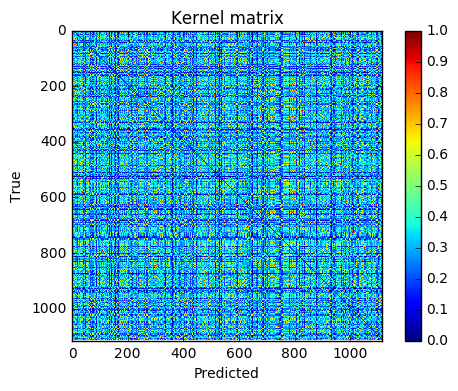

In [5]:
# Collect the sizes of the data and test data for future use
T = testd.shape[0]
nshape = data.shape[0]
N = random.sample(xrange(nshape), 11000)

# Create the Y matrix
y = np.zeros((len(N),1))
for i in xrange(0,len(N)):
    y[i,0] = data.iloc[i].Sales   

# Create the indexes of points
random_data_points =  random.sample(xrange(nshape), 1115)
dataindex = np.arange(0, len(N), 1)   
testindex = np.arange(0, T, 1)

# create your matrixes to work on
kmm = creatematrix(random_data_points, random_data_points, data)
print "Kmm"
kmn = creatematrix(random_data_points, dataindex, data)
print "kmn"
knm = np.transpose(kmn)
print "knm"
ktm = creatematrix(testindex, random_data_points, testd)
print "ktm"

#Show visualization of kmm matrix
print kmm
plot_confusion_matrix(kmm)

In [6]:
#Calculate mu for each test point given the equation
k = np.linalg.inv(np.dot(kmn,knm)+4*kmm)
firstproduct = np.dot(kmn,y)
innerproduct = np.dot(k,firstproduct)
u = np.dot(ktm, innerproduct )
# uiques = np.unique(u)

# print len(uiques)


In [7]:
# write the mus for each file to a .csv file
sfile = open( 'mean_sub.csv', 'wb' )
sfile.write( '"Id","Sales"\n' )
for id in range( 0, N ):
    sfile.write( '%d,%.2f\n' % ( id+1, u[id] ) )  # add one for one-based indexing
sfile.close()

TypeError: range() integer end argument expected, got list.